# Water Quality Predictions using Machine Learning Algorithm

Safe Drinking water is essential to a healthy life. It is a fundamental human right. Healthy drinking water is vital as a health and development issue at a national, regional and local level in some regions investing in water supply and sanitation can yield a net economic benefit since the reductions in adverse health effects and healthcare costs outweigh the interventions'costs.

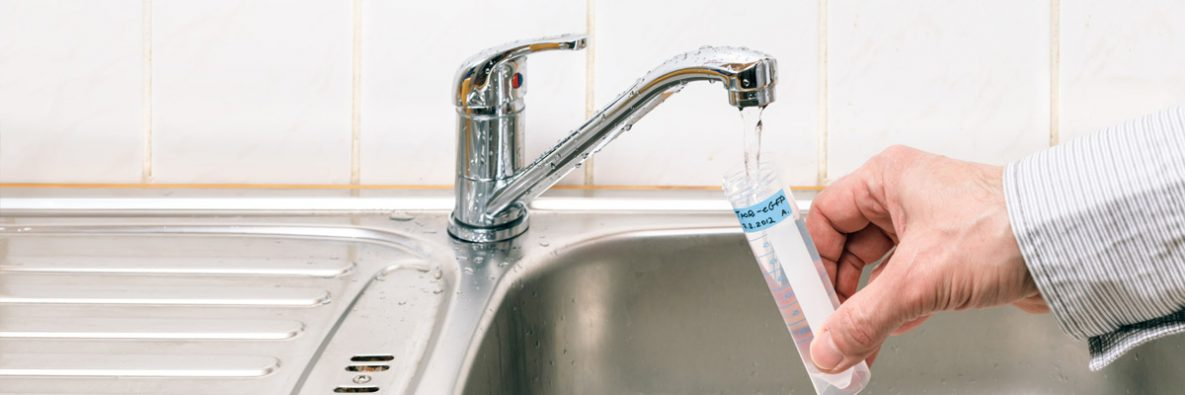

## Importing Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#checking current working directory
import os
os.getcwd()

'C:\\Users\\KIIT\\T&T Lab\\Project\\Water Quality Prediction'

In [4]:
#importing dataframe or dataset

data = pd.read_csv('water_potability.csv')
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [5]:
data.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [6]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Data Cleaning and Preprocessing

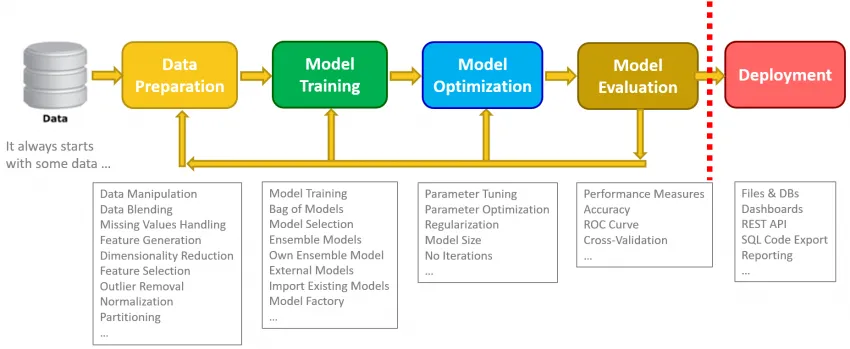

In [7]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [9]:
data['Solids']

0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3271    47580.991603
3272    17329.802160
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3276, dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

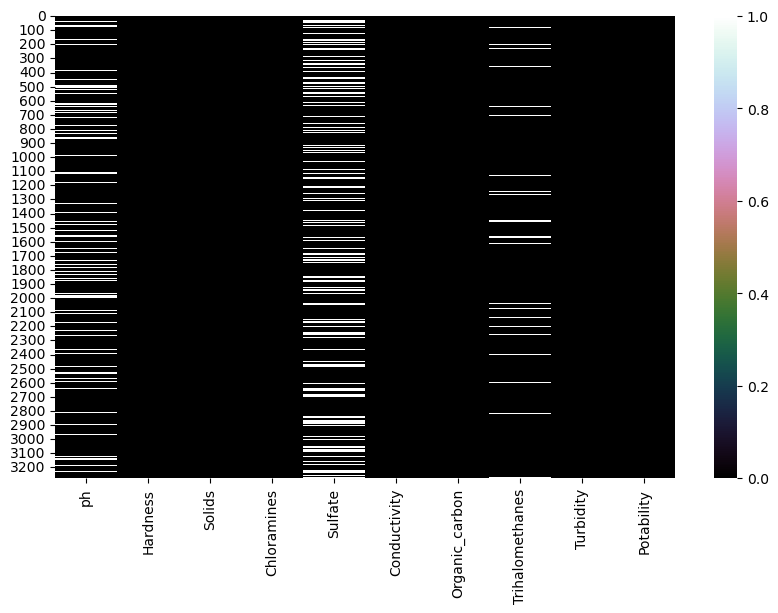

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap='cubehelix')

Text(0, 0.5, 'Percentage of missing values')

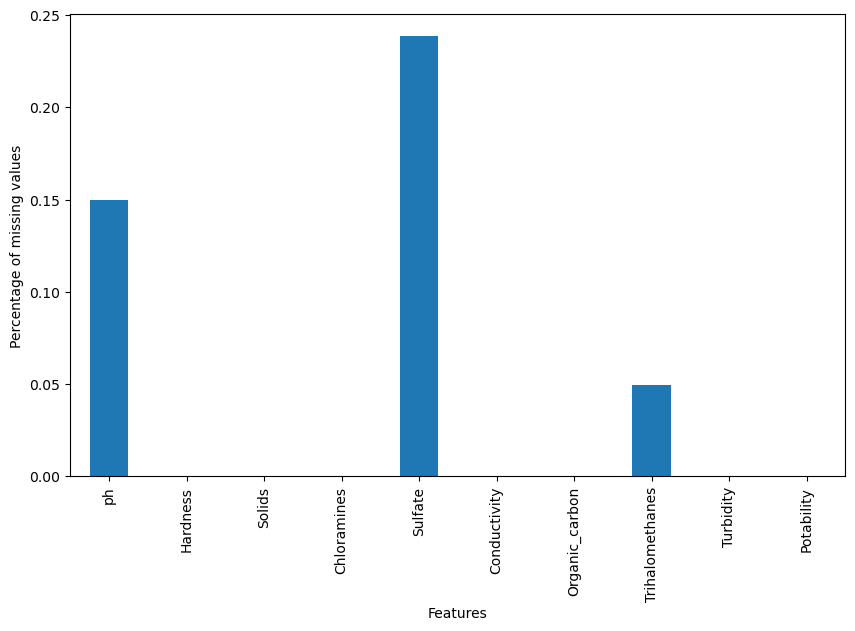

In [13]:
data.isnull().mean().plot.bar(figsize = (10,6))
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')

In [14]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
#data.fillna(data.mean(),inplace=True)

data['ph']=data['ph'].fillna(data['ph'].mean())
data['Sulfate']=data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

In [16]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

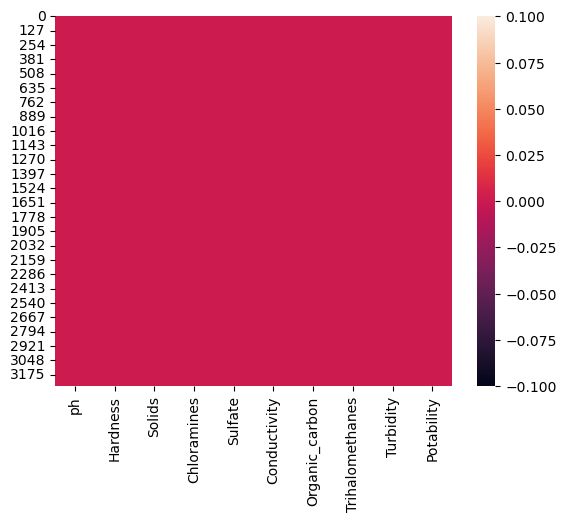

In [17]:
sns.heatmap(data.isnull())

# Exploratory Data Analysis

In [18]:
data.shape #represent shape in (rows,columns) format

(3276, 10)

In [19]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### Checking if we need to do Dimentionality Reduction

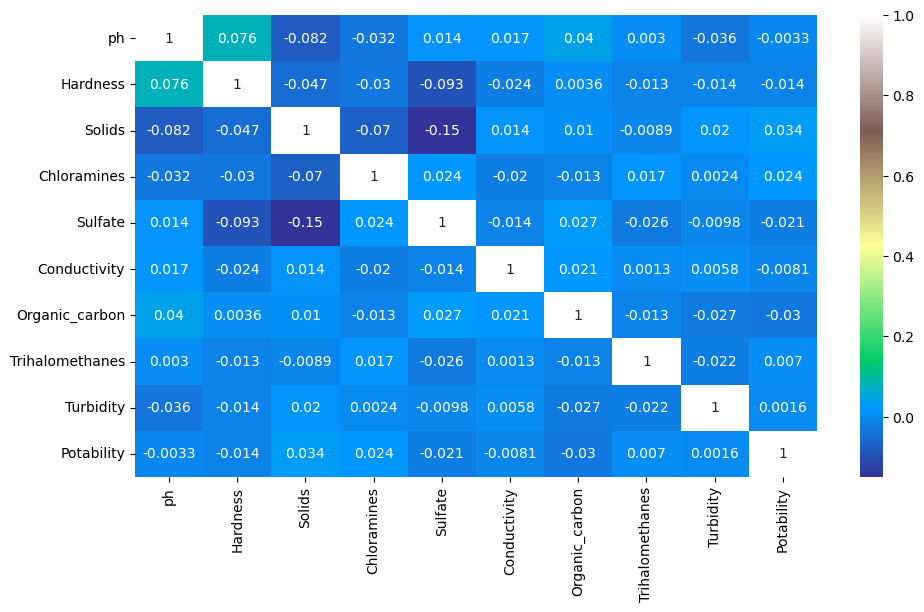

In [20]:
plt.figure(figsize=(11,6))
sns.heatmap(data.corr(),annot= True, cmap= 'terrain')
plt.show()

In [21]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

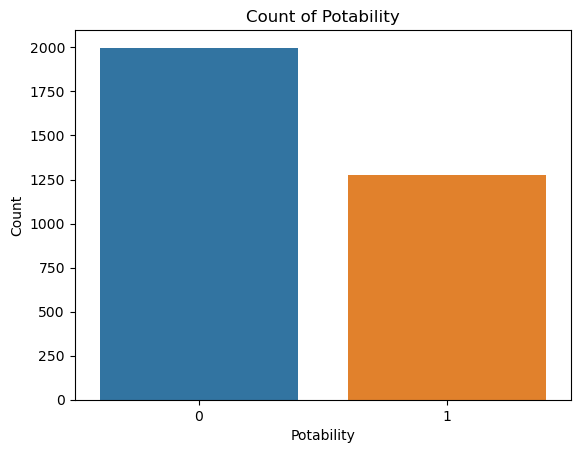

In [22]:
sns.countplot(x='Potability', data=data)
plt.xlabel('Potability')
plt.ylabel('Count') 
plt.title('Count of Potability') 
plt.show()


In [23]:
fig = px.pie(data, names='Potability', hole=0.4, template= 'plotly_dark')
fig.show()

In [24]:
fig = px.scatter(data, x= 'ph', y='Sulfate', color='Potability', template='plotly_dark')
fig.show()

### Lets check the outlier using box plot

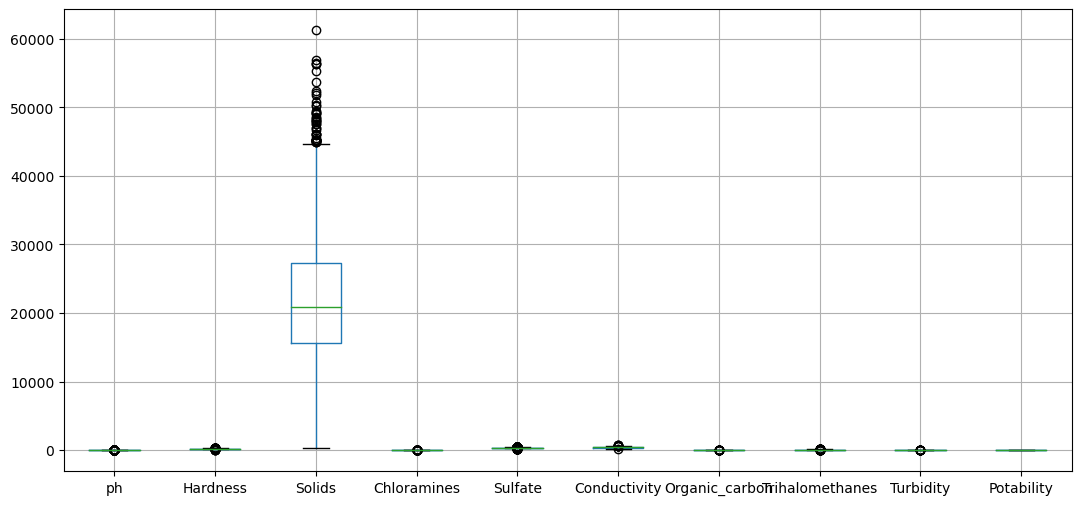

In [25]:
data.boxplot(figsize=(13,6))
plt.show()

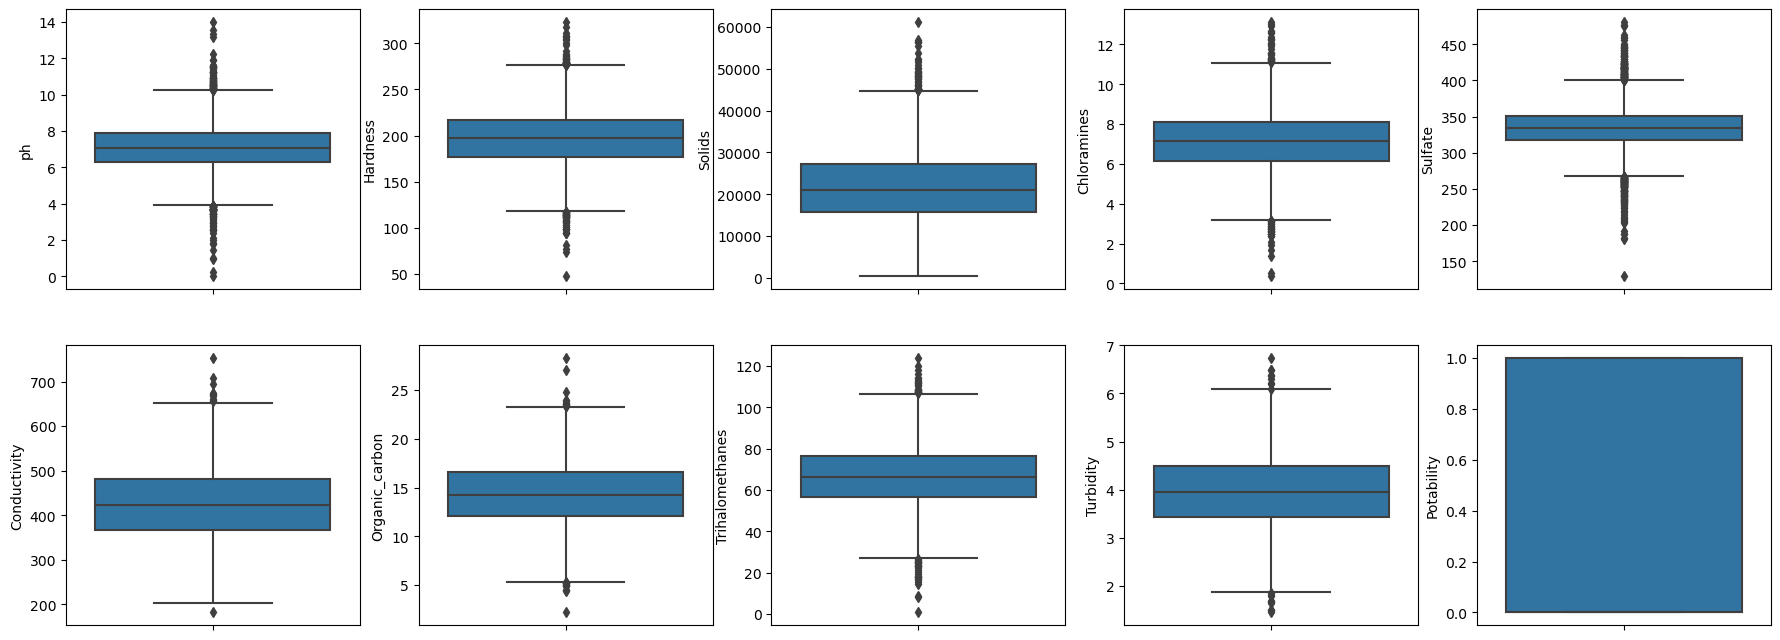

In [26]:
#Visualizing dataset and checking for outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (22,8))

ax = ax.flatten()

index = 0

for col, values in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    
    index += 1

### Not removing the outliers cuz they may be important to decide the quality of water.

In [27]:
data.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [28]:
data.shape

(3276, 10)

In [29]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

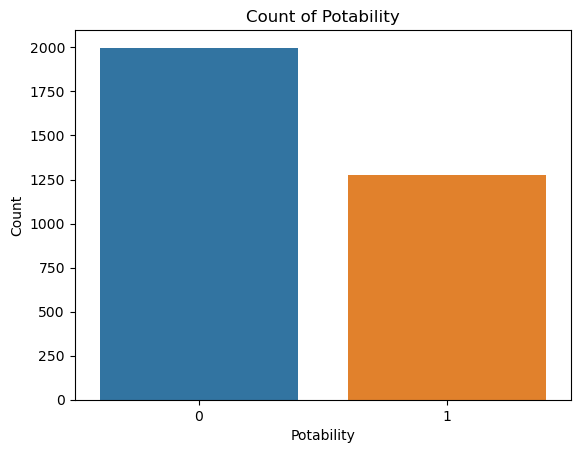

In [30]:
sns.countplot(x='Potability', data=data)

plt.xlabel('Potability')
plt.ylabel('Count') 
plt.title('Count of Potability') 
plt.show()

<Axes: xlabel='ph', ylabel='Count'>

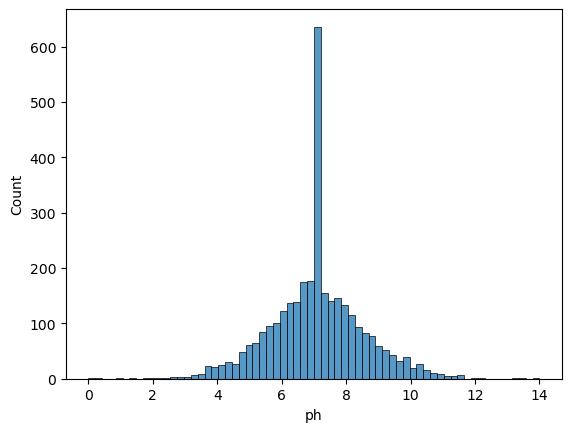

In [31]:
sns.histplot(data['ph'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



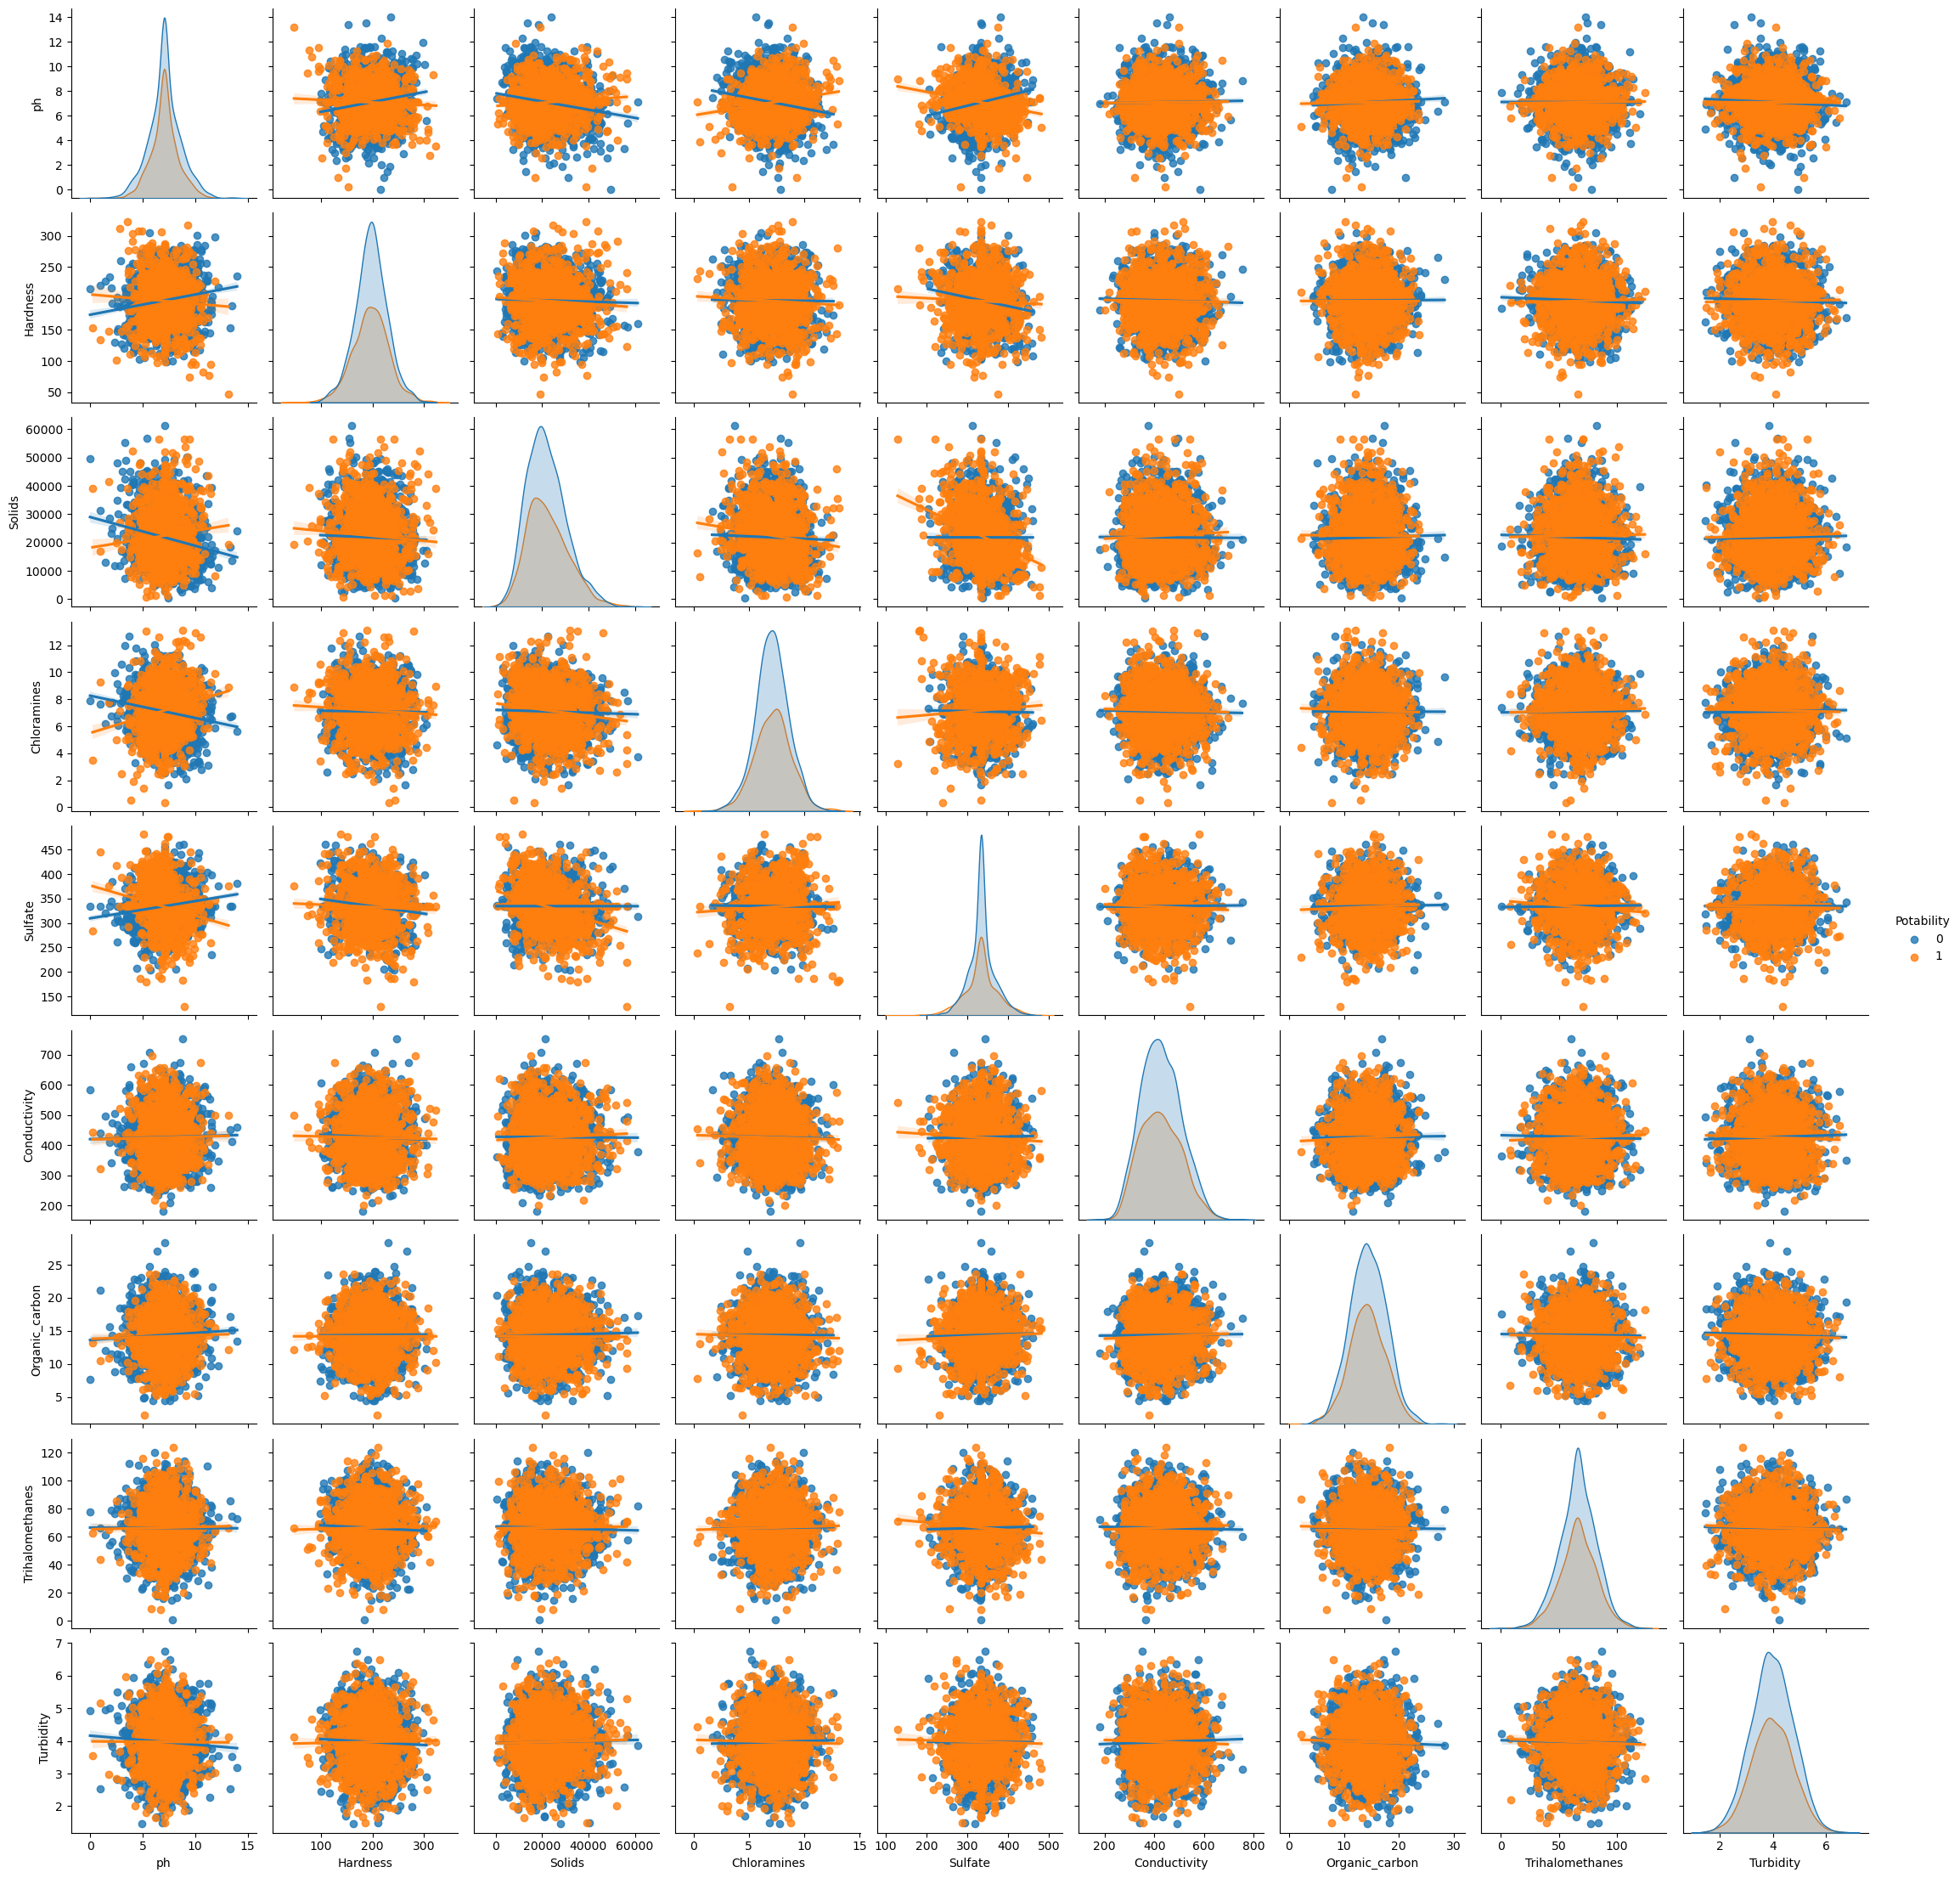

In [32]:
sns.pairplot(data, hue = 'Potability', kind='reg')
plt.show()

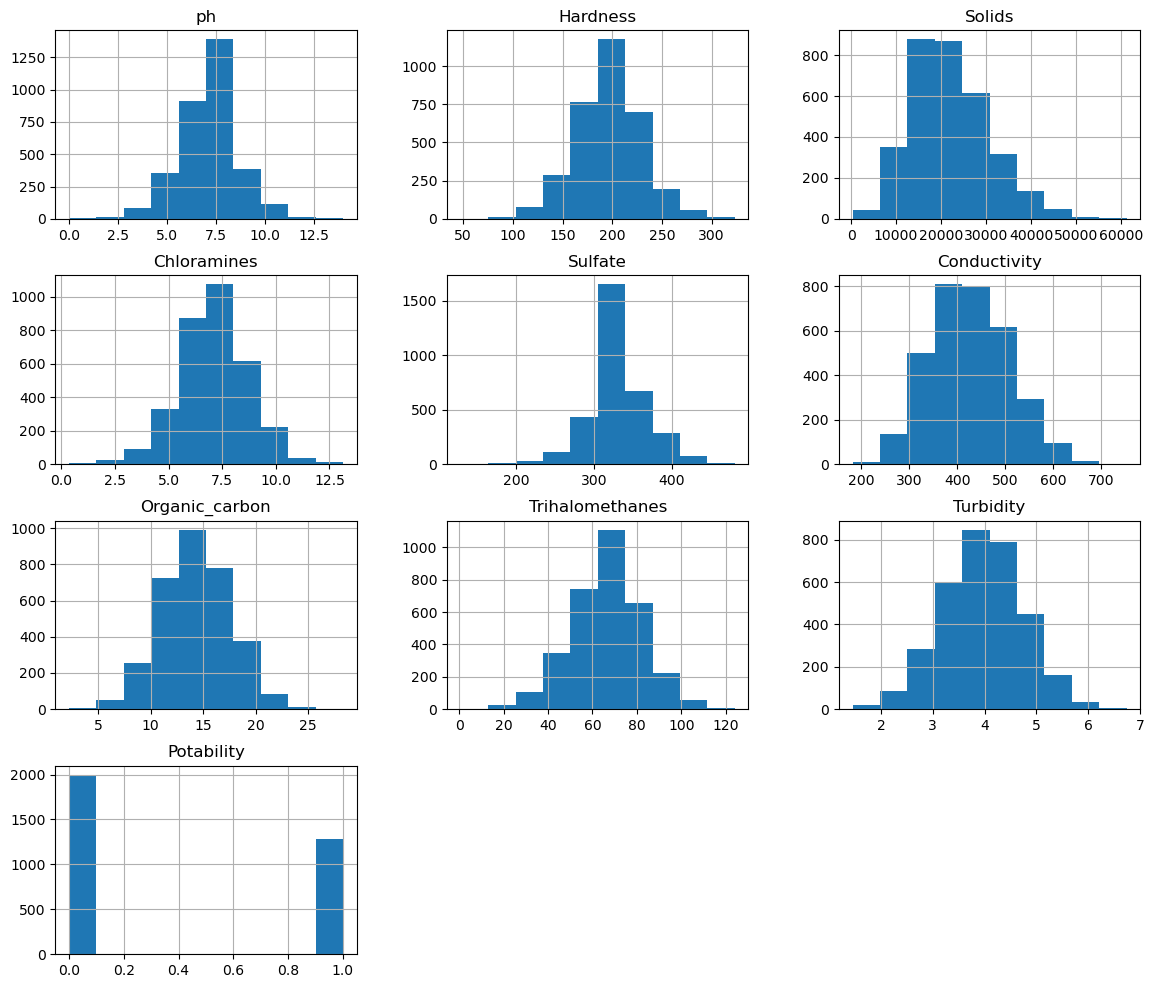

In [33]:
data.hist(figsize=(14,12))
plt.show()

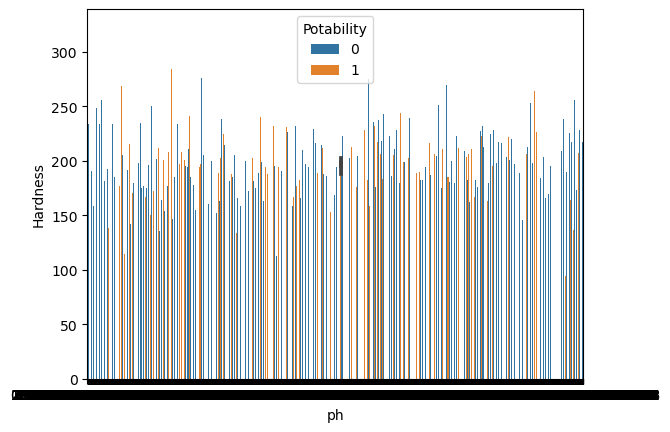

In [34]:
sns.barplot( x=data['ph'], y=data['Hardness'], hue=data['Potability'])
plt.show()

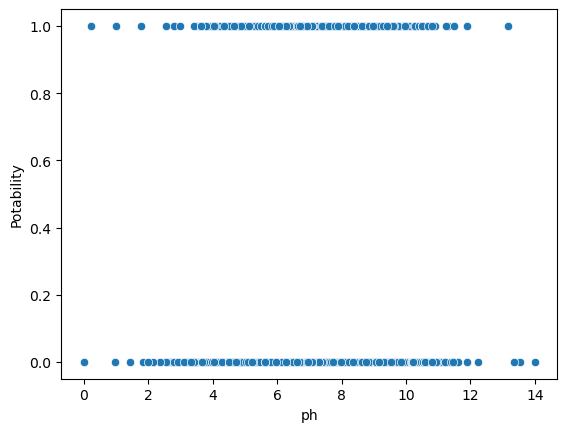

In [35]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

### Data Partitioning into Training and Testing Set

In [36]:
X = data.drop('Potability', axis=1)   #input data
Y= data['Potability'] #Target Variable

In [37]:
X.shape, Y.shape

((3276, 9), (3276,))

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=179)#502

In [40]:
X_train.shape, X_test.shape

((2620, 9), (656, 9))

In [41]:
X_train

columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

new_data = pd.DataFrame(X_train, columns=columns)

pd.set_option('display.precision', 2)

new_data

ph  Hardness  Solids  Chloramines   Sulfate  Conductivity  \
0    -2.53e-01      0.91   -1.57         0.36 -1.21e+00         -1.75   
1     2.05e-01      0.22   -2.35         2.53  3.93e+00         -0.80   
2    -8.21e-01      0.21   -0.32         1.32  3.15e-15         -0.07   
3    -6.04e-16      0.74    0.61        -1.65 -1.05e-01          0.47   
4     2.12e+00      0.47   -0.03         0.23  3.15e-15         -0.38   
...        ...       ...     ...          ...       ...           ...   
2615  8.24e-01      0.45   -0.23         1.04 -1.61e+00          0.62   
2616 -6.67e-01     -1.09   -0.93         0.27  9.11e-01          0.29   
2617 -2.16e+00      0.02   -0.10        -0.08  3.15e-15          0.23   
2618 -7.59e-01     -0.05   -0.53        -1.68  1.96e+00         -0.24   
2619  1.19e-02      0.34    0.07        -0.53 -1.06e+00         -1.60   

      Organic_carbon  Trihalomethanes  Turbidity  
0              -0.73            -0.92       0.14  
1               0.68            -0.71      -0.81  
2              -0.96            -0.07       1.85  
3              -0.09             0.00       2.18  
4               2.19            -0.24      -0.89  
...              ...              ...        ...  
2615           -0.50             0.01      -0.69  
2616            1.34            -0.13      -2.30  
2617            0.70             1.51       0.72  
2618           -0.83            -1.16       0.27  
2619            0.85             0.29       1.21  

[2620 rows x 9 columns]

In [42]:
X_test

columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

new_data_2 = pd.DataFrame(X_test, columns=columns)

pd.set_option('display.precision', 2)

new_data_2

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0   -3.24e-01      0.51    0.18    -3.25e-01    -0.23          0.05   
1   -3.91e-01      1.34    0.86    -2.19e-01     0.22         -1.99   
2   -2.12e-01     -0.83   -1.25    -6.40e-04    -0.77         -1.69   
3    2.23e+00     -1.83    3.03     1.29e+00    -0.16         -0.75   
4   -1.02e+00     -0.25    0.77     2.67e-01    -0.20         -1.80   
..        ...       ...     ...          ...      ...           ...   
651 -6.04e-16      1.40   -1.40    -4.56e-01    -3.37         -0.92   
652  4.60e-01     -0.29    0.05     2.15e-01     0.26         -1.30   
653  1.27e+00      0.29   -0.78    -2.59e+00    -1.38         -0.25   
654 -2.71e+00      0.06    2.64     4.42e-01    -0.25          0.01   
655  5.85e-01      0.02   -1.28     2.49e-01     1.41         -0.25   

     Organic_carbon  Trihalomethanes  Turbidity  
0              0.02            -2.09       0.63  
1             -0.22             1.70       0.68  
2              1.29            -0.28       1.61  
3              1.12             0.70       0.30  
4             -1.78            -0.73      -1.80  
..              ...              ...        ...  
651           -1.17             0.22       0.85  
652            1.60             0.00      -1.44  
653            1.46            -0.05      -2.72  
654            0.38            -0.75       0.36  
655            0.59             0.52      -1.25  

[656 rows x 9 columns]

In [43]:
Y_train

2506    0
1537    1
307     1
641     0
1396    0
       ..
292     1
2762    1
23      0
371     1
1433    0
Name: Potability, Length: 2620, dtype: int64

In [44]:
Y_test

655     0
367     1
183     0
283     1
5       0
       ..
786     1
1235    0
2796    1
2993    0
1421    0
Name: Potability, Length: 656, dtype: int64

In [45]:
Y_train.count(), Y_test.count()

(2620, 656)

# Model Training

## Logistic Regression

In [50]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

#object of LR
model_lr = LogisticRegression()


In [51]:
#Training of the model

model_lr.fit(X_train, Y_train)

LogisticRegression()

In [52]:
#Making predictions

pred_lr = model_lr.predict(X_test)

In [53]:
X_test[0]

array([-0.3244038 ,  0.50521981,  0.17685024, -0.32477739, -0.23305461,
        0.05107728,  0.02053852, -2.09248765,  0.63078803])

In [54]:
model_lr.predict([[-6.04313345e-16, -1.01701555e+00,  3.31066056e-01, -4.72429011e-01,
        1.50916801e+00,  8.42497442e-01,  3.84728589e-03,  1.16738272e+00,
        4.28685181e-01]])

array([0], dtype=int64)

In [55]:
#Checking accuracy score
accuracy_score_lr = accuracy_score(Y_test, pred_lr)*100
accuracy_score_lr

64.48170731707317

In [56]:
cm1 = confusion_matrix(Y_test, pred_lr)
cm1

array([[422,   0],
       [233,   1]], dtype=int64)

## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

#Creating model object
model_rf = RandomForestClassifier()

In [58]:
#Training Model RT
model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [59]:
#Making Prediction
pred_rf = model_rf.predict(X_test)

In [60]:
accuracy_score_rf = accuracy_score(Y_test, pred_rf)*100
accuracy_score_rf

67.53048780487805

In [61]:
cm4 = confusion_matrix(Y_test, pred_rf)
cm4

array([[361,  61],
       [152,  82]], dtype=int64)

## SVM

In [62]:
from sklearn.svm import SVC

#Creating object of Model
model_svm = SVC(kernel='rbf')

In [63]:
#Model Training
model_svm.fit(X_train, Y_train)

SVC()

In [64]:
#Make Prediction
pred_svm = model_svm.predict(X_test)

In [65]:
accuracy_score_svm = accuracy_score(Y_test, pred_svm)*100
accuracy_score_svm

71.64634146341463

In [66]:
cm6 = confusion_matrix(Y_test, pred_svm)
cm6

array([[398,  24],
       [162,  72]], dtype=int64)

## XGBoosT Classifier

In [67]:
#pip install xgboost

In [68]:
from xgboost import XGBClassifier

#Create Model
model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.03)

In [69]:
#Training Model
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
#Prediction
pred_xgb = model_xgb.predict(X_test)

In [71]:
#accuracy
accuracy_score_xgb = accuracy_score(Y_test, pred_xgb)*100
accuracy_score_xgb

66.76829268292683

In [72]:
cm8 = confusion_matrix(Y_test, pred_xgb)
cm8

array([[358,  64],
       [154,  80]], dtype=int64)

## AdaBoosT Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
#Making object of Model
model_ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.03)

In [74]:
#Training of the model
model_ada.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.03)

In [75]:
#Making predictions
pred_ada = model_ada.predict(X_test)

In [76]:
accuracy_score_ada = accuracy_score(Y_test, pred_ada)*100
accuracy_score_ada

65.54878048780488

In [77]:
cm7 = confusion_matrix(Y_test, pred_ada)
cm7

array([[417,   5],
       [221,  13]], dtype=int64)

## kNN-- K-Nearest-Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
max_accuracy=0
for i in range(9,35):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, Y_train)
    pred_knn =  model_knn.predict(X_test)
    accuracy_score_knn = accuracy_score(Y_test, pred_knn)*100
    print(i, accuracy_score_knn)
    for j in range(i,35):
        if(accuracy_score_knn>max_accuracy):
            max_accuracy=accuracy_score_knn
            n=j
        
print('Maximum accuracy of', max_accuracy , 'obtained with', n , 'neighbours' )

9 66.61585365853658
10 67.22560975609755
11 67.22560975609755
12 68.59756097560977
13 67.83536585365853
14 68.29268292682927
15 69.0548780487805
16 69.51219512195121
17 68.29268292682927
18 68.59756097560977
19 67.53048780487805
20 68.29268292682927
21 67.3780487804878
22 69.20731707317073
23 68.59756097560977
24 68.59756097560977
25 69.0548780487805
26 68.75
27 69.35975609756098
28 69.0548780487805
29 69.8170731707317
30 69.0548780487805
31 69.96951219512195
32 69.20731707317073
33 69.0548780487805
34 69.8170731707317
Maximum accuracy of 69.96951219512195 obtained with 31 neighbours


In [79]:
model_knn = KNeighborsClassifier(n_neighbors=31)
model_knn.fit(X_train, Y_train)
pred_knn =  model_knn.predict(X_test)
accuracy_score_knn = accuracy_score(Y_test, pred_knn)*100
print(accuracy_score_knn)

69.96951219512195


In [80]:
cm5 = confusion_matrix(Y_test, pred_knn)
cm5

array([[399,  23],
       [174,  60]], dtype=int64)

<Axes: >

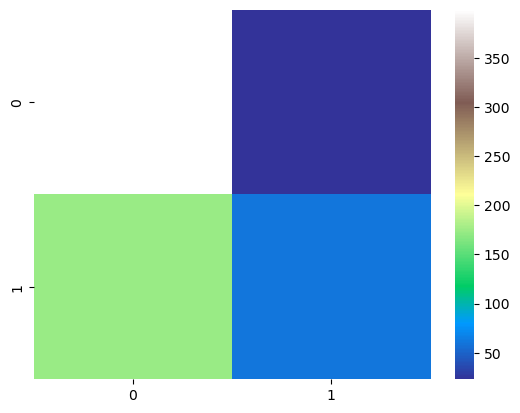

In [81]:
sns.heatmap(cm5, cmap='terrain')

## Decision Tree Classifier

In [82]:
#pip install --upgrade scikit-learn

In [83]:
import sklearn
print(sklearn.__version__)

1.2.2


In [84]:
from sklearn.tree import DecisionTreeClassifier

#creating the model object
model_dt = DecisionTreeClassifier()

In [85]:
#Training of Decision Tree
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [86]:
X_test

array([[-0.3244038 ,  0.50521981,  0.17685024, ...,  0.02053852,
        -2.09248765,  0.63078803],
       [-0.39117482,  1.33593184,  0.8578075 , ..., -0.21608867,
         1.69780982,  0.6802094 ],
       [-0.21175406, -0.83445287, -1.24861654, ...,  1.28820269,
        -0.27872071,  1.60683465],
       ...,
       [ 1.27292468,  0.28967072, -0.77844003, ...,  1.46352994,
        -0.048008  , -2.72012612],
       [-2.7071058 ,  0.06446148,  2.63877065, ...,  0.37644548,
        -0.74977377,  0.36050549],
       [ 0.58508555,  0.02069885, -1.28331877, ...,  0.59023504,
         0.52103212, -1.251674  ]])

In [87]:
Y_test

655     0
367     1
183     0
283     1
5       0
       ..
786     1
1235    0
2796    1
2993    0
1421    0
Name: Potability, Length: 656, dtype: int64

In [88]:
#Making predictions using Decision Tree
pred_dt = model_dt.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [90]:
accuracy_score_dt = accuracy_score(Y_test, pred_dt)*100
accuracy_score_dt

60.0609756097561

In [91]:
cm2 = confusion_matrix(Y_test, pred_dt)
cm2

array([[279, 143],
       [119, 115]], dtype=int64)

<Axes: >

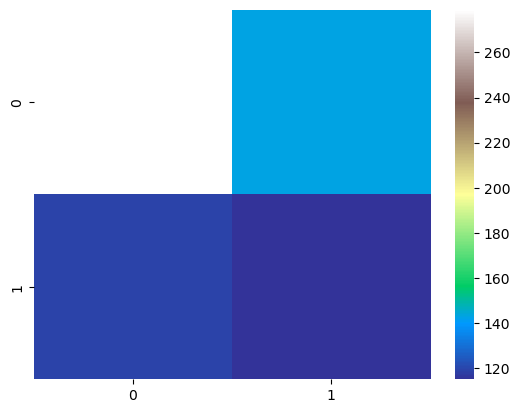

In [92]:
sns.heatmap(cm2, cmap='terrain')

### Model Optimization / Hyper Parameter Tuning

### KNN HPT

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search_knn = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_knn.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_knn.best_score_:.3f} using {grid_search_knn.best_params_}")
means = grid_search_knn.cv_results_['mean_test_score']
stds = grid_search_knn.cv_results_['std_test_score']
params = grid_search_knn.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Best: 0.651 using {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
0.585 (0.019) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.585 (0.019) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.621 (0.017) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.585 (0.019) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.594 (0.030) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.596 (0.029) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.619 (0.024) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.604 (0.020) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.613 (0.027) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.615 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.625 (0.027) with: {'metric': 'euclidean', 'n_neighbors': 6, 'weights'

### Decision Tree HPT

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ['best', 'random']
min_samples_split = range(1,10)

parameters = dict(criterion=criterion, splitter=splitter, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits = 5, random_state=101)

grid_search_cv_dt = GridSearchCV(estimator=dt, param_grid=parameters, scoring='accuracy', cv=cv)

In [95]:
grid_search_cv_dt.fit(X_train, Y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params(

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [96]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'gini', 'min_samples_split': 9, 'splitter': 'best'}


In [97]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [98]:
accuracy_score(Y_test, prediction_grid) * 100

57.62195121951219

In [99]:
confusion_matrix(prediction_grid, Y_test)

array([[266, 122],
       [156, 112]], dtype=int64)

### Prediction on only one dataset

In [100]:
X_test

array([[-0.3244038 ,  0.50521981,  0.17685024, ...,  0.02053852,
        -2.09248765,  0.63078803],
       [-0.39117482,  1.33593184,  0.8578075 , ..., -0.21608867,
         1.69780982,  0.6802094 ],
       [-0.21175406, -0.83445287, -1.24861654, ...,  1.28820269,
        -0.27872071,  1.60683465],
       ...,
       [ 1.27292468,  0.28967072, -0.77844003, ...,  1.46352994,
        -0.048008  , -2.72012612],
       [-2.7071058 ,  0.06446148,  2.63877065, ...,  0.37644548,
        -0.74977377,  0.36050549],
       [ 0.58508555,  0.02069885, -1.28331877, ...,  0.59023504,
         0.52103212, -1.251674  ]])

In [101]:
Y_test

655     0
367     1
183     0
283     1
5       0
       ..
786     1
1235    0
2796    1
2993    0
1421    0
Name: Potability, Length: 656, dtype: int64

### Majority Voting Algorithm

In [102]:
from sklearn.metrics import accuracy_score

def evaluate(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(Y_train, train_pred)
    test_accuracy = accuracy_score(Y_test, test_pred)
    
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    
    return {'eval_train':train_accuracy, 'eval_test': test_accuracy}

In [103]:
from sklearn.ensemble import VotingClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.svm import SVC  

estimators = []  
log_reg = LogisticRegression(solver='liblinear')  
estimators.append(('Logistic', log_reg))  

dt = DecisionTreeClassifier() 
estimators.append(('Tree', dt))  

knn_clf = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', knn_clf))

rf_clf = RandomForestClassifier()
estimators.append(('RF', rf_clf))

svm_clf = SVC(gamma='scale')  
estimators.append(('SVM', svm_clf))  

voting = VotingClassifier(estimators=estimators)  

evaluate_res = evaluate(voting, X_train, X_test, Y_train, Y_test)

accuracy_score_mv = evaluate_res['eval_test']*100

Training Accuracy: 0.7648854961832061
Testing Accuracy: 0.7073170731707317


## Accuracy Visualization

In [104]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
             "Decision Tree",
             "Random Forest",
             "KNN",
             "SVM",
             "AdaBoost",
             "XGBoosT",
             "Majority Voting"],
    
    "Accuracy Score": [accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn,
                       accuracy_score_svm, accuracy_score_ada, accuracy_score_xgb, accuracy_score_mv] 
})

In [105]:
models

Model  Accuracy Score
0  Logistic Regression           64.48
1        Decision Tree           60.06
2        Random Forest           67.53
3                  KNN           69.97
4                  SVM           71.65
5             AdaBoost           65.55
6              XGBoosT           66.77
7      Majority Voting           70.73

Model  Accuracy Score
4                  SVM           71.65
7      Majority Voting           70.73
3                  KNN           69.97
2        Random Forest           67.53
6              XGBoosT           66.77
5             AdaBoost           65.55
0  Logistic Regression           64.48
1        Decision Tree           60.06

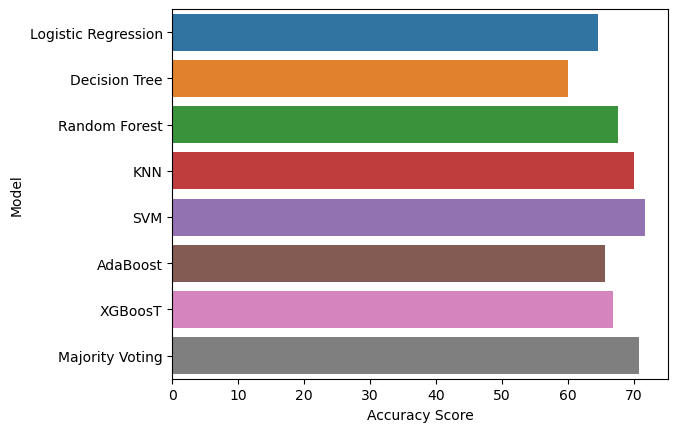

In [106]:
sns.barplot(x='Accuracy Score', y='Model', data=models)
models.sort_values(by='Accuracy Score', ascending= False)